In [39]:
import math

def get_tasks_for_thread(remainder: int, num_tasks_default: int, thread: int):
    num_tasks = num_tasks_default + 1 if thread < remainder else num_tasks_default
    threads_default = max(thread - remainder, 0)
    threads_default_plus = thread - threads_default
    start = threads_default * num_tasks_default + threads_default_plus * (num_tasks_default + 1)
    end = start + num_tasks - 1
    return num_tasks, start, end

def divide_tasks(tasks: int, threads: int):
    remainder = tasks % threads
    num_tasks_default = math.floor(tasks / threads)
    for thread in range(threads):
        num_tasks, start, end = get_tasks_for_thread(remainder, num_tasks_default, thread)
        print(f"Thread {thread}: tasks {start}-{end}, i.e. {num_tasks} tasks.")        

In [3]:
import wandb

runs = ["vxvf4i0w", "3njns1lq", "3g0ak4qs", "27jmrhhb", "3e03fz07", ]

for run in runs:
    api = wandb.Api()
    run = api.run(f"joasiee/convergence_tests/{run}")
    run.config["downsampling"] = 3
    run.update()

In [15]:
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()
entity, project = "joasiee", "convergence_tests"  # set to your entity and project
runs = api.runs(entity + "/" + project)
names, configs, histories = [], [], []

for run in runs:
    if run.state == "finished":
        names.append(run.name)
        configs.append(
            {k: v for k, v in run.config.items()
             if not k.startswith('_')})
        histories.append(run.history())

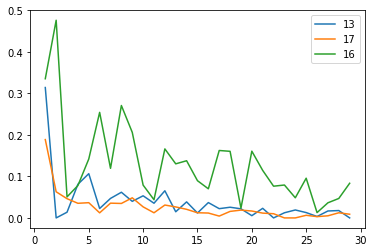

In [18]:
for i, history in enumerate(histories):
    if configs[i]["downsampling"] == 3:
        history["R0/metric_pct"] = history["R0/metric"].pct_change().abs()
        history["R0/metric_pct"].plot.line(label=configs[i]["instance"])
plt.legend()